In [2]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import scienceplots
import h5py as h5
import pickle
from pathlib import Path

In [4]:
without_dist_grad_path = "losses_hist/NAHEA_CNN_dist_grad_false_train_hist_2025_07_28.pickle"
no_Qtrain_path = "losses_hist/NAHEA_CNN_dist_grad_false_QNoTrain_train_hist_2025_07_28.pickle"
classical_path_leaned_ch_collapse = "losses_hist/classical_CNN_kernel_size_4_sin_Learned_Channel_Collpase_train_hist.pickle"
classical_path = "losses_hist/classical_CNN_kernel_size_4_sin_train_hist.pickle"

with open(without_dist_grad_path, "rb") as f:
    loss_hist_without_dist_grad = pickle.load(f)["loss_hist"]
with open(classical_path, "rb") as f:
    loss_hist_classical = pickle.load(f)["loss_hist"]
with open(no_Qtrain_path, "rb") as f:
    loss_hist_no_Qtrain = pickle.load(f)["loss_hist"]

with open(classical_path_leaned_ch_collapse, "rb") as f:
    loss_hist_classical_learned_ch_collapse = pickle.load(f)["loss_hist"]

In [5]:
plt.style.use(["science", "grid"])

Saved figure to figures/train_hist_comparison_sin.pdf


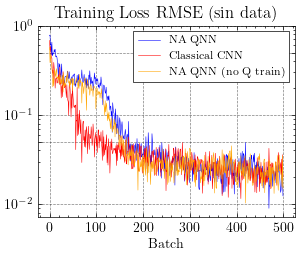

In [12]:
textwidth = 3.31314
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
fig, ax = plt.subplots(figsize=(width, height))
# plt.plot(np.sqrt(loss_hist_with_dist_grad), label="Neutral Atoms QNN", color='blue')
lw = 0.4
plt.plot(np.sqrt(loss_hist_without_dist_grad), label="NA QNN", color='blue', lw = lw)
# plt.plot(np.sqrt(loss_hist_classical), label="Classical CNN (learned channel collapse)", color='green')
plt.plot(np.sqrt(loss_hist_classical_learned_ch_collapse), label="Classical CNN", color='red', lw = lw)
plt.plot(np.sqrt(loss_hist_no_Qtrain), label="NA QNN (no Q train)", color='orange', lw = lw )
plt.title("Training Loss RMSE (sin data)")
plt.xlabel("Batch")
# plt.ylabel("Loss (RMSE)")
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.yticks([0.01, 0.05, 0.1, 0.5, 1])
# ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True, useOffset=False))
# ax.ticklabel_format(style='plain', axis='y')  # avoid scientific notation
# ax.ticklabel_format(useMathText=True)
# plt.setp(ax.get_yticklabels(), rotation=45, fontsize=8)
legend = plt.legend(fancybox=False, edgecolor="black", fontsize=8, loc='upper right')
legend.get_frame().set_linewidth(0.5)
# plt.tight_layout()
path = Path("figures")
path.mkdir(parents=True, exist_ok=True)
plt.savefig(path / "train_hist_comparison_sin.pdf", bbox_inches='tight', dpi=300)
print(f"Saved figure to {path / 'train_hist_comparison_sin.pdf'}")
# plt.savefig("train_hist_comparison_sin.pdf", bbox_inches='tight', dpi
plt.show()